## 1. Setup and Preprocessing

In [ ]:
!nvidia-smi

Sat May  1 15:13:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# from google.colab import drive

In [ ]:
# drive.mount('/content/gdrive')

In [ ]:
# !wget --no-check-certificate https://www.dropbox.com/s/j8w8uo7y2uqxo7o/data.csv
!wget --no-check-certificate https://www.dropbox.com/s/owz4fdu830okkry/data_2.csv


--2021-05-02 16:16:10--  https://www.dropbox.com/s/owz4fdu830okkry/data_2.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/owz4fdu830okkry/data_2.csv [following]
--2021-05-02 16:16:10--  https://www.dropbox.com/s/raw/owz4fdu830okkry/data_2.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7f6ba3fb5b0af8f01f73842e2.dl.dropboxusercontent.com/cd/0/inline/BNt5ZAlTSRYFcZDUYFKCs5TCEyzQhCD3EVWYFMeo96xHNSH2cHDQ_wigNVUc03yfPtk11frvfFKb2MxqrQWMIoCQ0drfFYxAvztPin8YH-SIVlZorT5y4JYNf0nmo6fDV4REk_ZX1AwYNZJqp6FJsCil/file# [following]
--2021-05-02 16:16:10--  https://uce7f6ba3fb5b0af8f01f73842e2.dl.dropboxusercontent.com/cd/0/inline/BNt5ZAlTSRYFcZDUYFKCs5TCEyzQhCD3EVWYFMeo96xHNSH2cHDQ_wigNVUc03yfPtk11frvfFKb2MxqrQWMIoCQ0drfFYxA

In [ ]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt



##Load data

In [ ]:
# data_df = pd.read_csv('data.csv')
data_df = pd.read_csv('data_2.csv')

In [ ]:
# Show the top 5 rows
display(data_df.head())
# Summarize the data

data_df.Type.value_counts()

,Sentence,Type,Label
0,ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น,แง่ลบ,1
1,ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา,แง่ลบ,1
2,ก็แค่เด็กขี้แยไม่ต้องมาแคร์ก็ได้,แง่ลบ,1
3,ก็แค่โสดไม่ได้อ่อยแค่โสดนานหน่อยไม่ได้อ่อยจริง...,แง่ลบ,1
4,กฎของกระจกคือการสะท้อนกลับมาแต่กฎของเวลาคือการ...,ข้อคิด,2


แง่บวก    995
ข้อคิด    709
แง่ลบ     598
Name: Type, dtype: int64

In [ ]:
data_df.shape


(2302, 3)

##Data cleaning

In [ ]:
display(data_df.Type.unique())

array(['แง่ลบ', 'ข้อคิด', 'แง่บวก'], dtype=object)

In [ ]:
data_df_quote = data_df[["Sentence", "Type"]]
data_df_quote.columns = ['Sentence', 'Type']
display(data_df_quote.describe())
display(data_df_quote.Type.unique())



,Sentence,Type
count,2302,2302
unique,2298,3
top,ก็เหมือนคนนั้นไงมีเข้ามาก็ต้องจากไปอยู่ดี,แง่บวก
freq,2,995


array(['แง่ลบ', 'ข้อคิด', 'แง่บวก'], dtype=object)

In [ ]:
data_df_quote['Clean_Type']=data_df_quote['Type'].str.lower().copy()
display(data_df_quote.describe())
display(data_df_quote.Type.unique())

,Sentence,Type,Clean_Type
count,2302,2302,2302
unique,2298,3,3
top,ก็เหมือนคนนั้นไงมีเข้ามาก็ต้องจากไปอยู่ดี,แง่บวก,แง่บวก
freq,2,995,995


array(['แง่ลบ', 'ข้อคิด', 'แง่บวก'], dtype=object)

In [ ]:
data_df_quote['Type']=data_df_quote['Clean_Type'].str.lower().copy()
data_df_quote.drop('Clean_Type', axis=1, inplace=True)
display(data_df_quote.describe())

,Sentence,Type
count,2302,2302
unique,2298,3
top,ก็เหมือนคนนั้นไงมีเข้ามาก็ต้องจากไปอยู่ดี,แง่บวก
freq,2,995


In [ ]:
data_df_quote = data_df_quote.drop_duplicates("Sentence", keep="first")
display(data_df_quote.describe())

,Sentence,Type
count,2298,2298
unique,2298,3
top,แบตหมดให้เดินหาปลั๊กแต่ถ้าขาดความรักให้เดินมาห...,แง่บวก
freq,1,995


In [ ]:
qoute_label = np.array(data_df_quote["Type"])

In [ ]:
!wget https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf

--2021-05-02 16:28:22--  https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
Resolving awards.opdc.go.th (awards.opdc.go.th)... 164.115.76.22
Connecting to awards.opdc.go.th (awards.opdc.go.th)|164.115.76.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘THSarabunNew.ttf’

THSarabunNew.ttf        [ <=>                ]  17.63K  --.-KB/s    in 0.002s  

2021-05-02 16:28:29 (10.5 MB/s) - ‘THSarabunNew.ttf’ saved [18054]



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install pythainlp
!pip install marisa_trie
!pip install PyICU

     |████████████████████████████████| 11.0MB 283kB/s 
     |████████████████████████████████| 747kB 38.4MB/s 
     |████████████████████████████████| 276kB 3.8MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-linux_x86_64.whl size=861621 sha256=f1e1756571cb833ffc38cb9868695f6fcd475fd70dc0fa7589ae52642443f847
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie
     |████████████████████████████████| 296kB 2.8MB/s 
  Created wheel for PyICU: filename=PyICU-2.7.2-cp37-cp37m-linux_x86_64.whl size=1341228 sha256=6ecf2b66f120dafca7c0608706a1c9bf635e022b0ce9d05d9b4f952787ef86d5
  Stored in directory: /root/.cache/pip/wheels/76/d5/80/bb5bb9071021eff7241fc700124c0af4caadccf2db23e8dcee
Successfully built PyICU


In [ ]:
sentences = []
n=1
chars = dict()
reverse_chars = dict()

chars[' '] = 0

reverse_chars[0]=' '

dictionary = dict()
re_dictionary = dict()

for sentence in data_df_quote["Sentence"]:
  split1 = sentence.split()
  if n < 2:
    print(sentence)
    print(split1)
    n+=1
  for c in sentence:
    if chars.get(c) == None:
      chars[c] = len(chars)
      reverse_chars[len(reverse_chars)] = c
   

  sentences.append(split1)


ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น
['ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น']


In [ ]:
from pythainlp.tokenize import Tokenizer
from pythainlp.corpus.common import thai_words
import marisa_trie

custom_words_list = set(thai_words())
custom_words_list.add('<PHONE_NUMBER_REMOVED>')
trie = marisa_trie.Trie(custom_words_list)

_tokenizer4 = Tokenizer(custom_dict=trie,engine="newmm")
# _tokenizer4 = Tokenizer(engine="icu")

In [ ]:
token_sentences =[]
for sentence in sentences:
  tmp = []
  for token in sentence:
    tokens = _tokenizer4.word_tokenize(token)
    tmp.extend(tokens)
    for w in tokens:
      if dictionary.get(w) == None:
        dictionary[w] = len(dictionary)
        re_dictionary[len(re_dictionary)] = w
  token_sentences.append(tmp)
dictionary['<s>'] = len(dictionary)
re_dictionary[len(re_dictionary)] = '<s>'
dictionary['</s>'] = len(dictionary)
re_dictionary[len(re_dictionary)] = '</s>'


In [ ]:
len(dictionary)

3452

['ข้อคิด' 'แง่บวก' 'แง่ลบ']


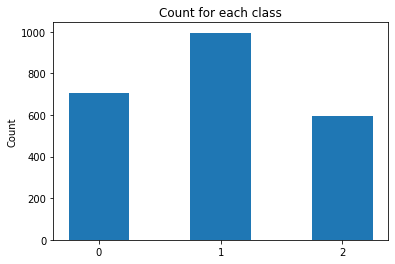

In [ ]:
def plot(label, count):
    fig, ax = plt.subplots()
    ind = np.arange(len(count))
    rects1 = ax.bar(ind, count, 0.5)

    ax.set_ylabel('Count')
    ax.set_title('Count for each class')
    ax.set_xticks(ind)
    print(label)
    # ax.set_xticklabels(label)
    plt.show()
    
label, count = np.unique(qoute_label, return_counts=True)
plot(label, count)


## 2. Prepare Data

In [ ]:
data_quote = data_df_quote.to_numpy()

unique_label = data_df_quote.Type.unique()

label_2_num_map = dict(zip(unique_label, range(len(unique_label))))
num_2_label_map = dict(zip(range(len(unique_label)), unique_label))

print("Create Mappings")
display(num_2_label_map)
display(label_2_num_map)

print("Before Mappings")
display(data_quote[:, 1])
data_quote[:,1] = np.vectorize(label_2_num_map.get)(data_quote[:,1])

print("After Mappings")
display(data_quote[:, 1])

Create Mappings


{0: 'แง่ลบ', 1: 'ข้อคิด', 2: 'แง่บวก'}

{'ข้อคิด': 1, 'แง่บวก': 2, 'แง่ลบ': 0}

Before Mappings


array(['แง่ลบ', 'แง่ลบ', 'แง่ลบ', ..., 'ข้อคิด', 'ข้อคิด', 'แง่บวก'],
      dtype=object)

After Mappings


array([0, 0, 0, ..., 1, 1, 2], dtype=object)

In [ ]:
def strip_str(string):
    return string.strip()
     
# Trim of extra begining and trailing whitespace in the string
print("Before")
print(data_quote)
data_quote[:,0] = np.vectorize(strip_str)(data_quote[:,0])
print("After")
print(data_quote)

Before
[['ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น' 0]
 ['ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา' 0]
 ['ก็แค่เด็กขี้แยไม่ต้องมาแคร์ก็ได้' 0]
 ...
 ['THEBIGเงินไม่ได้อยู่ในการซื้อและการขายแต่รออยู่' 1]
 ['Tomorrowisanotherdayยังไงก็ยังมีวันพรุ่งนี้ให้แก้ตัวเสมอ' 1]
 ['UVไม่ดีต่อตาแต่ถ้าyouมองมามันดีต่อใจ' 2]]
After
[['ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น' 0]
 ['ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา' 0]
 ['ก็แค่เด็กขี้แยไม่ต้องมาแคร์ก็ได้' 0]
 ...
 ['THEBIGเงินไม่ได้อยู่ในการซื้อและการขายแต่รออยู่' 1]
 ['Tomorrowisanotherdayยังไงก็ยังมีวันพรุ่งนี้ให้แก้ตัวเสมอ' 1]
 ['UVไม่ดีต่อตาแต่ถ้าyouมองมามันดีต่อใจ' 2]]


In [ ]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
def data_split(sentences):
    texts = []
    labels = []
    for sentence,label in sentences:
      texts.append(sentence)
      labels.append(label)
    return texts, labels

train_texts = data_quote
train_texts_label_0 = [s for s,l in train_texts if l == 0]
train_texts_label_1 = [s for s,l in train_texts if l == 1]
train_texts_label_2 = [s for s,l in train_texts if l == 2]

In [ ]:
print("Unique label is {}, nb. of train data = {}".format(np.unique(num_2_label_map), len(train_texts)))
for i in range(5):
  print("Data = {}".format(train_texts[i]))

Unique label is [{0: 'แง่ลบ', 1: 'ข้อคิด', 2: 'แง่บวก'}], nb. of train data = 2298
Data = ['ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น' 0]
Data = ['ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา' 0]
Data = ['ก็แค่เด็กขี้แยไม่ต้องมาแคร์ก็ได้' 0]
Data = ['ก็แค่โสดไม่ได้อ่อยแค่โสดนานหน่อยไม่ได้อ่อยจริงจริง' 0]
Data = ['กฎของกระจกคือการสะท้อนกลับมาแต่กฎของเวลาคือการไม่ย้อนกลับไป' 1]


In [ ]:
train_data =[]
for sentence in train_texts[:,0]:
  tmp = ['<s>']
  tokens = _tokenizer4.word_tokenize(sentence)
  tmp.extend(tokens)
  tmp.append('</s>')
  train_data.append(tmp)
tm = [len(qoute) for qoute in train_data]
max_length = max(tm)
mean_length = round(sum(tm)/(len(tm)+1))
print("Max len = ",max_length)
print("Mean len = ",mean_length)

Max len =  46
Mean len =  14


In [ ]:
word2i = {}
index2w = {}

index = 1

for sentence in train_data:
  for word in sentence:
    if word not in word2i:
      word2i[word] = index
      index2w[index] = word
      index += 1

In [ ]:
x_train_raw = []
y_train_raw = []

for sentence in train_data:
  for word_i in range(len(sentence)-1):
    x_train_raw.append(sentence[0:word_i+1])
    y_train_raw.append(sentence[word_i+1])

In [ ]:
x_train_raw[0]

['<s>']

In [ ]:
y_train_raw[0]

'ก็'

In [ ]:
from keras.preprocessing.sequence import pad_sequences
def toIndex(x_raw):
  x_id = []
  for sentence in x_raw:
    sen = []
    for word in sentence:
      sen.append(word2i[word])
    x_id.append(sen)
  return x_id

x_train_id = pad_sequences(toIndex(x_train_raw),maxlen=max_length-1)

y_train_id = []
for word in y_train_raw:
    y_train_id.append(word2i[word])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train_id, y_train_id, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=len(word2i)+1)
y_val = to_categorical(y_val,num_classes=len(word2i)+1)

# Embedding

In [ ]:
!pip install tf2crf

In [ ]:
from pythainlp import word_vector

word_embedding = word_vector.get_model()
word_embed = dict()
for word in word_embedding.vocab:
  word_embed[word] = word_embedding[word]
word_embed['UNK'] = np.zeros(300,dtype='float32')

Corpus: thai2fit_wv
- Downloading: thai2fit_wv 0.1


100%|██████████| 62452646/62452646 [00:00<00:00, 87522907.02it/s]


In [ ]:
word2i['ต่อตา']

3452

In [ ]:
embedding_matrix = np.zeros((len(word2i)+1, 300))
for word,i in word2i.items():
  if type(word_embed.get(word)) == type(None):
    embedding_vector = word_embed['UNK']
  else:
    embedding_vector = word_embed[word]
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector

In [ ]:
vocab_size, emdedding_size = embedding_matrix.shape

# Model

In [ ]:
"""
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Activation,Embedding,Dropout,Flatten,Bidirectional,BatchNormalization
from keras.layers import LSTM,GRU
from keras.optimizers import RMSprop,Adam
from keras.callbacks import LambdaCallback
from tf2crf import CRF, ModelWithCRFLoss
import random
import sys


model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[embedding_matrix], trainable=True))
model.add(Bidirectional(LSTM(units=emdedding_size, return_sequences=True)))
model.add(Flatten())
model.add(Dense(units=1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=vocab_size))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])
"""



"\nfrom keras.models import Sequential,Input,Model\nfrom keras.layers import Dense, Activation,Embedding,Dropout,Flatten,Bidirectional,BatchNormalization\nfrom keras.layers import LSTM,GRU\nfrom keras.optimizers import RMSprop,Adam\nfrom keras.callbacks import LambdaCallback\nfrom tf2crf import CRF, ModelWithCRFLoss\nimport random\nimport sys\n\n\nmodel = Sequential()\n\nmodel.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[embedding_matrix], trainable=True))\nmodel.add(Bidirectional(LSTM(units=emdedding_size, return_sequences=True)))\nmodel.add(Flatten())\nmodel.add(Dense(units=1024,activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.2))\nmodel.add(Dense(units=1024,activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.2))\nmodel.add(Dense(units=vocab_size))\nmodel.add(Activation('softmax'))\nmodel.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])\n"

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(tmp_data_0) - max_length - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = tmp_data_0[start_index: start_index + max_length]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, max_length, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, chars[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = reverse_chars[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
x_train.shape

(24306, 45)

In [ ]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Activation,Embedding,Dropout,Flatten,Bidirectional,BatchNormalization
from keras.layers import LSTM,GRU
from keras.optimizers import RMSprop,Adam
from keras.callbacks import LambdaCallback
from tf2crf import CRF, ModelWithCRFLoss
import random
import sys

input = Input(shape = (max_length-1,))
embed = Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[embedding_matrix], trainable=True,input_length=max_length-1)(input)
lstm = Bidirectional(LSTM(units=emdedding_size, return_sequences=True,recurrent_dropout=0.2))(embed)
flatten = Flatten()(lstm)
x = Dense(units=1024,activation='relu')(flatten)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(units=1024,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(units=len(word2i)+1,activation='softmax')(x)
model = Model(input,output)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 45)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 45, 300)           1035900   
_________________________________________________________________
bidirectional (Bidirectional (None, 45, 600)           1442400   
_________________________________________________________________
flatten (Flatten)            (None, 27000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              27649024  
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0     

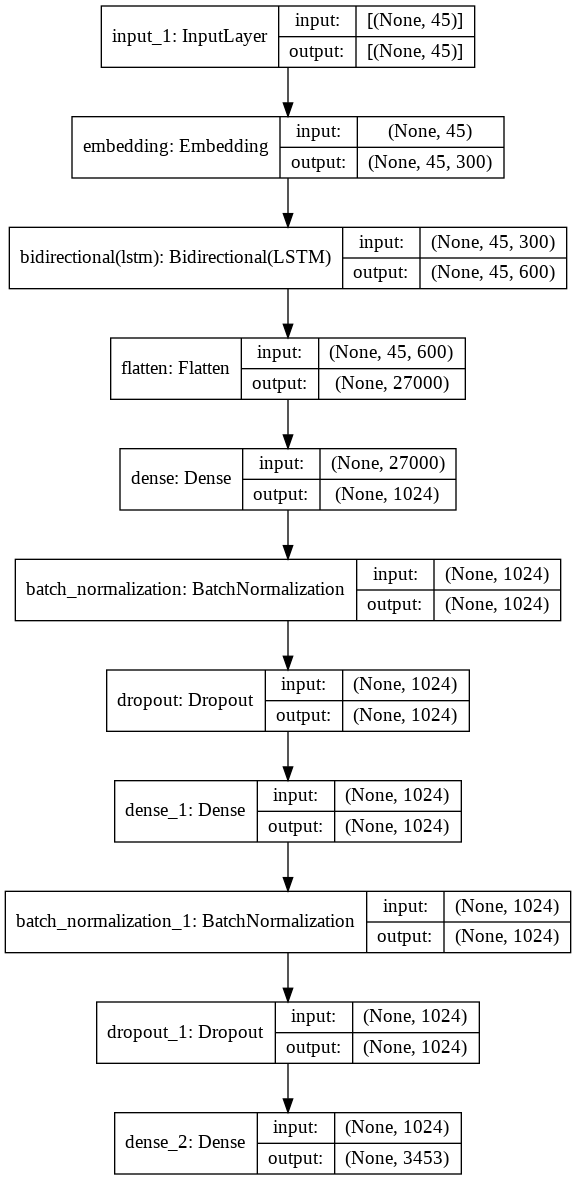

In [ ]:
from keras.utils import plot_model
plot_model(model,to_file='text_gen_model.png',show_shapes=True)

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',
                             verbose=1, save_best_only=True,
                             mode='min')

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=2, min_lr=1e-7)
callbacks = [checkpoint, reduce_lr]

In [ ]:
x_train.shape

(24306, 45)

In [ ]:
y_train.shape

(24306, 3453)

In [ ]:
x_val.shape

(6537, 46)

In [ ]:
import keras
batch_size = 64 # minibatch size
num_epochs = 20 # number of epochs

history = model.fit(x_train,y_train, batch_size=256, epochs=num_epochs,verbose=1,validation_data=(x_val, y_val),callbacks=callbacks)

Epoch 1/20
95/95 [==============================] - 33s 306ms/step - loss: 8.2404 - accuracy: 0.0372 - val_loss: 7.8732 - val_accuracy: 0.0778

Epoch 00001: val_loss improved from inf to 7.87315, saving model to weights.hdf5
Epoch 2/20
95/95 [==============================] - 29s 305ms/step - loss: 7.5637 - accuracy: 0.0994 - val_loss: 7.5680 - val_accuracy: 0.0870

Epoch 00002: val_loss improved from 7.87315 to 7.56803, saving model to weights.hdf5
Epoch 3/20
95/95 [==============================] - 29s 302ms/step - loss: 7.0099 - accuracy: 0.1222 - val_loss: 7.2765 - val_accuracy: 0.0954

Epoch 00003: val_loss improved from 7.56803 to 7.27651, saving model to weights.hdf5
Epoch 4/20
95/95 [==============================] - 29s 302ms/step - loss: 6.5741 - accuracy: 0.1442 - val_loss: 6.9949 - val_accuracy: 0.1071

Epoch 00004: val_loss improved from 7.27651 to 6.99489, saving model to weights.hdf5
Epoch 5/20
95/95 [==============================] - 28s 297ms/step - loss: 6.1732 - accu

technique               min_loss
LR 0.001                 6.1
LR 5-e5                  6.3852
เพิ่ม dropout              6.0465

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


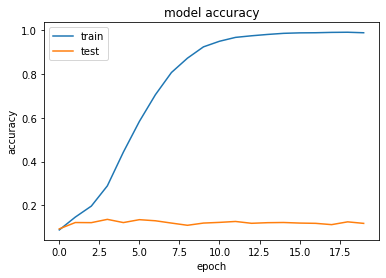

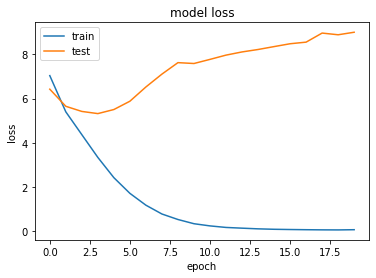

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights("weights.hdf5")

In [ ]:
x_pred = np.zeros(( mean_length, len(dictionary)))
x_pred[0,dictionary['ถอย']]
pred = model.predict(x_pred)

ValueError: ignored

In [ ]:
re_dictionary[3451]

'</s>'

In [ ]:
dictionary['</s>']

3451

In [ ]:
# def generate_text(diversity,seed):
#     # Get random starting text
#     # start_index = random.randint(0, len(tmp_data) - max_length - 1)
#     generated = ''
#     # sentence = tmp_data[start_index: start_index + max_length]
#     sentence= _tokenizer4.word_tokenize(seed)
#     generated += seed
#     # generated += sentence
#     c = 0
#     while True:
#       x_pred = np.zeros((1, mean_length, len(dictionary)))
#       for t, char in enumerate(sentence):
#         x_pred[0, t, dictionary[char]] = 1.
#       preds = model.predict(x_pred, verbose=0)[0]
#       next_index = sample(preds, diversity)
#       next_char = re_dictionary[next_index]
#       if next_char == "</s>" or c > mean_length:
#         break
#       c+=1
#       generated += next_char
#       tmp_sen = sentence[1:]
#       tmp_sen.append(next_char)
#       sentence = tmp_sen

#     return generated

def sample(preds, temperature=1.0):
  if temperature <= 0:
    return np.argmax(preds)
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)

def generate_next(text,max_gen_len, num_generated=10):
  word_idxs = [dictionary[word] for word in _tokenizer4.word_tokenize(text)]
  
  for i in range(max_gen_len):
    prediction = model.predict(x=np.array(word_idxs))
    idx = sample(prediction[-1], temperature=0.3)
    if re_dictionary[idx] == '</s>':
      break
    word_idxs.append(idx)
  return ''.join(re_dictionary[idx] for idx in word_idxs)

In [ ]:
np.array([dictionary[word] for word in _tokenizer4.word_tokenize('ใคร')])

array([56])

In [ ]:
len(prediction[0])

3452

In [ ]:
dictionary['เฉียง']

2594

In [ ]:
print(generate_next( 'ใคร',20))
# print(generate_text( 100,'ความรักทำให้คนตาบอดส่วน'))
print(generate_next( 'รัก',20))
print(generate_next( 'แต่',20))

ValueError: ignored

In [ ]:
print(generate_next('ขอบคุณที่ทิ้งกันในวันที่ฉันไม่เหลือ'))

ขอบคุณที่ทิ้งกันในวันที่ฉันไม่เหลือว่าจะไม่ใช่เราจะไม่ใช่ออกไปกับตัวเองได้นะ


In [ ]:
data_df_quote[]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
import copy
def cal_score(score_list, length, normalized=False):
  seq_score = 0
  for i in range(length):
    score_list[i] = score_list[i]+0.00000001
  if normalized:
    a = np.log(score_list)
    seq_score = np.exp(a.mean())
  else:
    score_list = np.log(score_list)
    for score in score_list:
      seq_score += score
    seq_score = np.exp(seq_score)
  return seq_score

In [ ]:
def texts_to_sequences(text, word_to_index):
  text = text.strip().split(" ")
  token_list = [word_to_index[x] for x in text]
  return token_list

In [ ]:
def greedy_decode(seed_text, max_gen_length, model, word_to_index, index_to_word, input_len):
  """Greedy decodes with seed text.

  Args:
    seed_text: The seed string to be used as initial input to the model.
    max_gen_length: Maximum length for generation.
                    The decoding process must terminate when this length is reached
    model: Pretrained keras model for prediction.
    word_to_index: The dictionary for converting word to index.
    input_len: A number indicating how many previously generated words will be used as 
               inputs for the model.
  
  Your code should do the followings:
      1. Convert current_text to sequences of indices by calling texts_to_sequences()
      2. Pad the sequence with 0s. You might find pad_sequences() function useful
      3. Predict the next token using the model (by calling model.predict() or model.predict_classes())
         and choose the token with the highest score as output
      4. Convert the predicted index to word and concat it to current_text
      5. Return text prediction and a list of probabilities of each step
      
  You do not need to stop early when end-of-sequence token is generated and can continue decoding
  until max_gen_length is reached. We can filter the eos token out later.
      
  The index is converted back to text after every step purely for simplicity. 
  When working with real problem you should stick with index until the decoding is done.
  But you can always call a function provided by the library so there is no need to implement this yourself.
  """
  current_text = seed_text
  probs = []
  for _ in range(max_gen_length):
    ### YOUR CODE HERE
    current_seq = [texts_to_sequences(current_text,word_to_index)]
    current_seq = pad_sequences(current_seq,maxlen=input_len)
    prediction = model.predict(current_seq)
    pos = np.argmax(prediction[0])
    probs.append(prediction[0][pos])
    output_word = index_to_word[pos]
    ### END YOUR CODE
    
    current_text += " " + output_word
  return current_text.title(), probs

In [ ]:
def beam_search_decode(seed_text, max_gen_len, model, word_to_index, index_to_word, max_sequence_len, beam_size, normalized=False):
  """We will do beam search decoing using seed text in this function.
    
  Output:
    beams: A list of top k beams after the decoding ended, each beam is a list of 
      [seed_text, list of scores, length]

  Your code should do the followings:
    1.Loop until max_gen_len is reached.
    2.During each step, loop through each beam and use it to predict the next word.
      If a beam is already ended, continues without expanding.
    3.Sort all hypotheses according to cal_score().
    4.Keep top k hypotheses to be used at the next step.
  """
  # For each beam we will store (generated text, list of scores, and current length)
  # Add initial beam
  beams = [[seed_text, [], 0]]
  
  for _ in range(max_gen_len):
    all_h = []
    all_h_skip = []
    skip = []
    for beam in beams:
      current_text = beam[0]
      if current_text.strip().split(" ")[-1] == '</s>':
        all_h_skip.append(beam)
        continue
      current_seq = [texts_to_sequences(current_text,word_to_index)]
      current_seq = pad_sequences(current_seq,maxlen=max_sequence_len)
      prediction = model.predict(current_seq)
      
      for pos in range(len(prediction[0])):
        current_score = copy.deepcopy(beam[1])
        temp_pos = sample(prediction[0],temperature)
        current_score.append(prediction[0][temp_pos])
        current_h = [current_text+" "+index_to_word[pos],current_score,len(current_score)]
        all_h.append(current_h)
    for beam_i in range(len(all_h)):
      all_h[beam_i].append(cal_score(all_h[beam_i][1],all_h[beam_i][2],normalized))
    all_h = all_h + all_h_skip
    all_h.sort(reverse = True,key=lambda x:x[3])
    beams = all_h[:beam_size]
  return beams

In [ ]:
def temperature_sampling_decode(seed_text, max_gen_length, model, word_to_index, index_to_word, input_len, temperature):
  """Greedy decodes with seed text using temperature sampling.

  Args:
    seed_text: The seed string to be used as initial input to the model.
    max_gen_length: Maximum length for generation.
                    The decoding process must terminate when this length is reached
    model: Pretrained keras model for prediction.
    word_to_index: The dictionary for converting word to index.
    input_len: A number indicating how many previously generated words will be used as 
               inputs for the model.
    temperature: temperature.

  The retured probs must be before rescaling.
  """
  current_text = seed_text
  probs = []
  for _ in range(max_gen_length):
    ### YOUR CODE HERE
    current_seq = [texts_to_sequences(current_text,word_to_index)]
    current_seq = pad_sequences(current_seq,maxlen=input_len)
    prediction = model.predict(current_seq)
    pos = sample(prediction[0],temperature)
    probs.append(prediction[0][pos])
    output_word = index_to_word[pos]
    ### END YOUR CODE
    current_text += " " + output_word
  return current_text.title(), probs

In [ ]:
def clean_output(text, eos_token):
  """Drop eos_token and every words that follow"""
  text = text.strip().split(" ")
  trim_index = len(text)
  for i in range(len(text)):
    if text[i] == eos_token:
      trim_index = i
      break
  return " ".join(text[:trim_index]),trim_index

In [ ]:
max_length

45

In [ ]:
max_gen_length = 20
beam_size = 10
unnormal_result = beam_search_decode("ข้อ",max_gen_length,model,dictionary,re_dictionary,max_length,beam_size,True)

In [ ]:
unnormal_result[4][0]

'ข้อ ไม่ ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง ต่าง กลับ'

In [ ]:
temperature_sampling_decode("แต่", max_gen_length, model, dictionary,re_dictionary, max_length,0.)

('แต่ พอ </S> ไม่ เป็น เพราะ มัน ไม่ ได้ </S> ไม่ มี เพราะ มัน ก็ ไม่ มี </S> ไม่ มี มา',
 [0.09054024,
  0.20589632,
  0.057657424,
  0.09423095,
  0.05972365,
  0.16843343,
  0.08285365,
  0.073434554,
  0.09530953,
  0.066845186,
  0.1035137,
  0.09030096,
  0.1613467,
  0.051099148,
  0.107636385,
  0.07352069,
  0.11620278,
  0.08714647,
  0.09421642,
  0.012144663])